## 1. Import Necessary Packages

In [1]:
import pandas as pd #for working with dataframe
import numpy as np
from scipy import stats, integrate #will help in stats operation in histograms
import matplotlib.pyplot as plt #to plot the PE
import seaborn as sns #nice looking plots
%matplotlib inline
sns.set(color_codes=True)

## 2. Create dataframe from the flatdata file

In [2]:
flatdata_adjusted=pd.read_csv('flatdata_coded.csv',encoding='latin-1')
pd.options.display.max_columns=50
flatdata_adjusted

,BriefDescription,InternalProjectID,ImprovementType,ImprovementType_Availability,AreaTypeFuncClass,AreaTypeFuncClass_Availability,State,Agency,TollType,TrafficForecast,ForecastYear,ForecastYear_Availability,ForecastYearType,YearForecastProduced,YearForecastProduced_Availability,ForecasterType,ForecastingType_Availability,ForecastMethodology,ForecastMethodology_Availability,SegmentDescription,ProjectID,SegmentID,CountID,Year_ofObservation,Count,Station_Identifier,CounterID,FunctionalClass,FunctionalClass_Availability,DiffYear_Availability,AdjustedForecast,UnemploymentRate_ForecastYear,UnemploymentRate_ForecastYear_Availability,UnemploymentRate_YearProduced,UnemploymentRate_YearProduced_Availability,UnemploymentRate_OpeningYear,UnemploymentRate_OpeningYear-Availability
0,NaN,2320,12,0,3,1,WI,F,No Tolls on 1+ lane,34000,2007,1,1,2006,1,1,1,1,1,NaN,58-6302-2320-,NaN,58-22417-401399,2007,31500,401399.0,58-22417-401399,3,1,1,34000.0,4.90,1,4.70,1,4.90,1
1,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,30000,2011,1,1,2007,1,1,1,1,1,NaN,58-6303-2467-,NaN,58-22419-404512,2011,22200,404512.0,58-22419-404512,3,1,1,30000.0,7.80,1,4.90,1,7.80,1
2,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,19000,2011,1,1,2007,1,1,1,1,1,NaN,58-6304-2467-,NaN,58-22421-404513,2011,20100,404513.0,58-22421-404513,3,1,1,19000.0,7.80,1,4.90,1,7.80,1
3,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,21900,2011,1,1,2007,1,1,1,1,1,NaN,58-6305-2467-,NaN,58-22423-404524,2011,18400,404524.0,58-22423-404524,4,1,1,21900.0,7.80,1,4.90,1,7.80,1
4,NaN,2322,12,0,3,1,WI,F,No Tolls on 1+ lane,22700,2009,1,1,2006,1,1,1,1,1,NaN,58-6306-2322-,NaN,58-22425-401843,2009,22600,401843.0,58-22425-401843,3,1,1,22700.0,8.60,1,4.70,1,8.60,1
5,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,2800,2011,1,1,2007,1,1,1,1,1,NaN,58-6307-2467-,NaN,58-22427-404541,2011,2500,404541.0,58-22427-404541,5,1,1,2800.0,7.80,1,4.90,1,7.80,1
6,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,33500,2011,1,1,2007,1,1,1,1,1,NaN,58-6308-2467-,NaN,58-22429-404545,2011,33500,404545.0,58-22429-404545,3,1,1,33500.0,7.80,1,4.90,1,7.80,1
7,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,1500,2011,1,1,2007,1,1,1,1,1,NaN,58-6309-2467-,NaN,58-22431-404547,2011,2200,404547.0,58-22431-404547,7,1,1,1500.0,7.80,1,4.90,1,7.80,1
8,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,23800,2011,1,1,2007,1,1,1,1,1,NaN,58-6310-2467-,NaN,58-22433-404548,2011,25400,404548.0,58-22433-404548,3,1,1,23800.0,7.80,1,4.90,1,7.80,1
9,NaN,2373,12,0,1,1,WI,F,No Tolls on 1+ lane,8600,2008,1,1,2006,1,1,1,1,1,NaN,58-6311-2373-,NaN,58-22435-510108,2008,6600,510108.0,58-22435-510108,3,1,1,8600.0,4.90,1,4.70,1,4.90,1


In [3]:
#flatdata_adjusted[flatdata_adjusted['AbsPE']>120].to_csv('outl.csv')

### 2.1 Create Columns for Analyses Variables
1. DiffYear= Difference between the Year actual count was available and the Year Forecast was Produced
2. Forecast Horizon= Dependent on DiffYear Variable, categorical variable.
3. Error= Coined as Actual Traffic Count minus the Forecasted Traffic Volume
4. Percent Error= Error over the Forecasted Traffic Volume.
5. AbsPE= Absolute Value of the Percent Error

In [4]:
flatdata_adjusted=flatdata_adjusted.assign(DiffYear=flatdata_adjusted['Year_ofObservation']-flatdata_adjusted['YearForecastProduced'])
flatdata_adjusted['ForecastHorizon'] = np.where(flatdata_adjusted['DiffYear']<=5, flatdata_adjusted['DiffYear'], '5+')
flatdata_adjusted=flatdata_adjusted.assign(Error=flatdata_adjusted['Count']-flatdata_adjusted['AdjustedForecast'])
flatdata_adjusted=flatdata_adjusted.assign(PercentError=100*flatdata_adjusted['Error']/flatdata_adjusted['AdjustedForecast'])
flatdata_adjusted=flatdata_adjusted.assign(AbsPE=np.abs(flatdata_adjusted['PercentError']))
flatdata_adjusted

,BriefDescription,InternalProjectID,ImprovementType,ImprovementType_Availability,AreaTypeFuncClass,AreaTypeFuncClass_Availability,State,Agency,TollType,TrafficForecast,ForecastYear,ForecastYear_Availability,ForecastYearType,YearForecastProduced,YearForecastProduced_Availability,ForecasterType,ForecastingType_Availability,ForecastMethodology,ForecastMethodology_Availability,SegmentDescription,ProjectID,SegmentID,CountID,Year_ofObservation,Count,Station_Identifier,CounterID,FunctionalClass,FunctionalClass_Availability,DiffYear_Availability,AdjustedForecast,UnemploymentRate_ForecastYear,UnemploymentRate_ForecastYear_Availability,UnemploymentRate_YearProduced,UnemploymentRate_YearProduced_Availability,UnemploymentRate_OpeningYear,UnemploymentRate_OpeningYear-Availability,DiffYear,ForecastHorizon,Error,PercentError,AbsPE
0,NaN,2320,12,0,3,1,WI,F,No Tolls on 1+ lane,34000,2007,1,1,2006,1,1,1,1,1,NaN,58-6302-2320-,NaN,58-22417-401399,2007,31500,401399.0,58-22417-401399,3,1,1,34000.0,4.90,1,4.70,1,4.90,1,1,1,-2500.0,-7.352941,7.352941
1,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,30000,2011,1,1,2007,1,1,1,1,1,NaN,58-6303-2467-,NaN,58-22419-404512,2011,22200,404512.0,58-22419-404512,3,1,1,30000.0,7.80,1,4.90,1,7.80,1,4,4,-7800.0,-26.000000,26.000000
2,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,19000,2011,1,1,2007,1,1,1,1,1,NaN,58-6304-2467-,NaN,58-22421-404513,2011,20100,404513.0,58-22421-404513,3,1,1,19000.0,7.80,1,4.90,1,7.80,1,4,4,1100.0,5.789474,5.789474
3,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,21900,2011,1,1,2007,1,1,1,1,1,NaN,58-6305-2467-,NaN,58-22423-404524,2011,18400,404524.0,58-22423-404524,4,1,1,21900.0,7.80,1,4.90,1,7.80,1,4,4,-3500.0,-15.981735,15.981735
4,NaN,2322,12,0,3,1,WI,F,No Tolls on 1+ lane,22700,2009,1,1,2006,1,1,1,1,1,NaN,58-6306-2322-,NaN,58-22425-401843,2009,22600,401843.0,58-22425-401843,3,1,1,22700.0,8.60,1,4.70,1,8.60,1,3,3,-100.0,-0.440529,0.440529
5,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,2800,2011,1,1,2007,1,1,1,1,1,NaN,58-6307-2467-,NaN,58-22427-404541,2011,2500,404541.0,58-22427-404541,5,1,1,2800.0,7.80,1,4.90,1,7.80,1,4,4,-300.0,-10.714286,10.714286
6,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,33500,2011,1,1,2007,1,1,1,1,1,NaN,58-6308-2467-,NaN,58-22429-404545,2011,33500,404545.0,58-22429-404545,3,1,1,33500.0,7.80,1,4.90,1,7.80,1,4,4,0.0,0.000000,0.000000
7,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,1500,2011,1,1,2007,1,1,1,1,1,NaN,58-6309-2467-,NaN,58-22431-404547,2011,2200,404547.0,58-22431-404547,7,1,1,1500.0,7.80,1,4.90,1,7.80,1,4,4,700.0,46.666667,46.666667
8,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,23800,2011,1,1,2007,1,1,1,1,1,NaN,58-6310-2467-,NaN,58-22433-404548,2011,25400,404548.0,58-22433-404548,3,1,1,23800.0,7.80,1,4.90,1,7.80,1,4,4,1600.0,6.722689,6.722689
9,NaN,2373,12,0,1,1,WI,F,No Tolls on 1+ lane,8600,2008,1,1,2006,1,1,1,1,1,NaN,58-6311-2373-,NaN,58-22435-510108,2008,6600,510108.0,58-22435-510108,3,1,1,8600.0,4.90,1,4.70,1,4.90,1,2,2,-2000.0,-23.255814,23.255814


### 2.2 Functions for Categorical Variables

In [18]:
def decade_produced(x): #Variable for calculating the decade forecast was produced
    if x.YearForecastProduced<=1980:
        decade=1
    elif x.YearForecastProduced<=1990:
        decade=2
    elif x.YearForecastProduced<=2000:
        decade=3
    elif x.YearForecastProduced<=2010:
        decade=4
    else:
        decade=5
    return decade
def agency(x): #Variable to mask the agency
    if x.State=='FL':
        agency='A'
    elif x.State=='MA':
        agency='B'
    elif x.State=='MI':
        agency='C'
    elif x.State=='MN':
        agency='D'
    elif x.State=='OH':
        agency='E'
    elif x.State=='WI':
        agency='F'
    else:
        agency='European Project'
    return agency
def areatype(x): #Variable for Project Area Type
    if x.AreaTypeFuncClass<3: #Area Type 1 and 2 are Rural and Mostly Rural Area
        area=1
    elif x.AreaTypeFuncClass<4: #Area Type 3 is Urban
        area=2
    else: #Area Type 4 is Unknown
        area=3
    return area
def decade_opening(x): #Variable for aggregating over the Project Forecast Year
    if x.ForecastYear<=1990: #Projects that are forecasted to open before 1990
        decade2=1
    elif x.ForecastYear<=2000: #Projects that are forecasted to open between 1990 and 2000
        decade2=2
    elif x.ForecastYear<=2002: #To account for the Recession in 2001. 2001 and 2002 was taken as the years of influence
        decade2=3   
    elif x.ForecastYear<=2008: 
        decade2=4
    elif x.ForecastYear<=2012: #To account for the recession in 2008, the effect of which continued till 2012
        decade2=5
    else:
        decade2=6
    return decade2
def decade_count(x): #Variable for aggregating over the Year of Observation, same as before.
    if x.Year_ofObservation<=1990:
        decade3='1'
    #elif x.Year_ofObservation<=2000:
        #decade3='2'
    elif x.Year_ofObservation<=2002:
        decade3='3'   
    elif x.Year_ofObservation<=2008:
        decade3='4'
    elif x.Year_ofObservation<=2012:
        decade3='5'
    else:
        decade3='6'
    return decade3
def UnifiedImprovement(x): #to unify the improvement Types
    if x.ImprovementType<7: #Projects on Existing Road
        unifiedtype=1
    elif x.ImprovementType<12: #New Construction Projects
        unifiedtype=2
    else:
        unifiedtype=3 #Unknown Type
    return unifiedtype

In [6]:
flatdata_adjusted=flatdata_adjusted.assign(Decade_ForecastProduced=flatdata_adjusted.apply(decade_produced,axis=1))
flatdata_adjusted=flatdata_adjusted.assign(Area=flatdata_adjusted.apply(areatype,axis=1))
flatdata_adjusted=flatdata_adjusted.assign(Decade_Opening=flatdata_adjusted.apply(decade_opening,axis=1))
flatdata_adjusted=flatdata_adjusted.assign(UnifiedImprovement=flatdata_adjusted.apply(UnifiedImprovement,axis=1))
flatdata_adjusted=flatdata_adjusted.assign(Agency=flatdata_adjusted.apply(agency,axis=1))
flatdata_adjusted

,BriefDescription,InternalProjectID,ImprovementType,ImprovementType_Availability,AreaTypeFuncClass,AreaTypeFuncClass_Availability,State,Agency,TollType,TrafficForecast,ForecastYear,ForecastYear_Availability,ForecastYearType,YearForecastProduced,YearForecastProduced_Availability,ForecasterType,ForecastingType_Availability,ForecastMethodology,ForecastMethodology_Availability,SegmentDescription,ProjectID,SegmentID,CountID,Year_ofObservation,Count,Station_Identifier,CounterID,FunctionalClass,FunctionalClass_Availability,DiffYear_Availability,AdjustedForecast,UnemploymentRate_ForecastYear,UnemploymentRate_ForecastYear_Availability,UnemploymentRate_YearProduced,UnemploymentRate_YearProduced_Availability,UnemploymentRate_OpeningYear,UnemploymentRate_OpeningYear-Availability,DiffYear,ForecastHorizon,Error,PercentError,AbsPE,Decade_ForecastProduced,Area,Decade_Opening,UnifiedImprovement
0,NaN,2320,12,0,3,1,WI,F,No Tolls on 1+ lane,34000,2007,1,1,2006,1,1,1,1,1,NaN,58-6302-2320-,NaN,58-22417-401399,2007,31500,401399.0,58-22417-401399,3,1,1,34000.0,4.90,1,4.70,1,4.90,1,1,1,-2500.0,-7.352941,7.352941,5,2,4,3
1,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,30000,2011,1,1,2007,1,1,1,1,1,NaN,58-6303-2467-,NaN,58-22419-404512,2011,22200,404512.0,58-22419-404512,3,1,1,30000.0,7.80,1,4.90,1,7.80,1,4,4,-7800.0,-26.000000,26.000000,5,2,5,3
2,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,19000,2011,1,1,2007,1,1,1,1,1,NaN,58-6304-2467-,NaN,58-22421-404513,2011,20100,404513.0,58-22421-404513,3,1,1,19000.0,7.80,1,4.90,1,7.80,1,4,4,1100.0,5.789474,5.789474,5,2,5,3
3,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,21900,2011,1,1,2007,1,1,1,1,1,NaN,58-6305-2467-,NaN,58-22423-404524,2011,18400,404524.0,58-22423-404524,4,1,1,21900.0,7.80,1,4.90,1,7.80,1,4,4,-3500.0,-15.981735,15.981735,5,2,5,3
4,NaN,2322,12,0,3,1,WI,F,No Tolls on 1+ lane,22700,2009,1,1,2006,1,1,1,1,1,NaN,58-6306-2322-,NaN,58-22425-401843,2009,22600,401843.0,58-22425-401843,3,1,1,22700.0,8.60,1,4.70,1,8.60,1,3,3,-100.0,-0.440529,0.440529,5,2,5,3
5,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,2800,2011,1,1,2007,1,1,1,1,1,NaN,58-6307-2467-,NaN,58-22427-404541,2011,2500,404541.0,58-22427-404541,5,1,1,2800.0,7.80,1,4.90,1,7.80,1,4,4,-300.0,-10.714286,10.714286,5,2,5,3
6,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,33500,2011,1,1,2007,1,1,1,1,1,NaN,58-6308-2467-,NaN,58-22429-404545,2011,33500,404545.0,58-22429-404545,3,1,1,33500.0,7.80,1,4.90,1,7.80,1,4,4,0.0,0.000000,0.000000,5,2,5,3
7,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,1500,2011,1,1,2007,1,1,1,1,1,NaN,58-6309-2467-,NaN,58-22431-404547,2011,2200,404547.0,58-22431-404547,7,1,1,1500.0,7.80,1,4.90,1,7.80,1,4,4,700.0,46.666667,46.666667,5,2,5,3
8,NaN,2467,12,0,3,1,WI,F,No Tolls on 1+ lane,23800,2011,1,1,2007,1,1,1,1,1,NaN,58-6310-2467-,NaN,58-22433-404548,2011,25400,404548.0,58-22433-404548,3,1,1,23800.0,7.80,1,4.90,1,7.80,1,4,4,1600.0,6.722689,6.722689,5,2,5,3
9,NaN,2373,12,0,1,1,WI,F,No Tolls on 1+ lane,8600,2008,1,1,2006,1,1,1,1,1,NaN,58-6311-2373-,NaN,58-22435-510108,2008,6600,510108.0,58-22435-510108,3,1,1,8600.0,4.90,1,4.70,1,4.90,1,2,2,-2000.0,-23.255814,23.255814,5,1,4,3


## 3. Aggregating on Internal Project ID for Project Level Analysis
The flatdata file contains the segment level data, which can be accumulated over the project level by the Unique Identifier for each projects. The Identified is the Internal Project ID.

In [6]:
#Taking the average of the Forecasted Volume and Actual Volume over all the segments.
averagecount=flatdata_adjusted['Count'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='AverageCount')
averageforecast=flatdata_adjusted['AdjustedForecast'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='AverageForecast')

#Project Improvement Type and Functional Class taken to be the Improvement Type with the Highest count among the segments.
improvement_type=flatdata_adjusted['ImprovementType'].groupby(flatdata_adjusted['InternalProjectID']).agg(lambda x:x.value_counts().index[0]).to_frame(name='ImprovementType')
func_class=flatdata_adjusted['FunctionalClass'].groupby(flatdata_adjusted['InternalProjectID']).agg(lambda x:x.value_counts().index[0]).to_frame(name='Func_Class')

#Forecast methodology is the same across the segments in a project and are coded as integer values. Hence taking the mean.
forecast_method=flatdata_adjusted['ForecastMethodology'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='Forecast_Method')

#Variables related to years- year forecast produced, year project is forecasted to open, year of observation.
#These values are taken to be the highest occuring onces.
year_produced=flatdata_adjusted['YearForecastProduced'].groupby(flatdata_adjusted['InternalProjectID']).agg(lambda x:x.value_counts().index[0]).to_frame(name='YearForecastProduced')
year_open=flatdata_adjusted['ForecastYear'].groupby(flatdata_adjusted['InternalProjectID']).agg(lambda x:x.value_counts().index[0]).to_frame(name='ForecastYear')
year_count=flatdata_adjusted['Year_ofObservation'].groupby(flatdata_adjusted['InternalProjectID']).agg(lambda x:x.value_counts().index[0]).to_frame(name='Year_ofObservation')
#diff_year=flatdata_adjusted['DiffYear'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='Diff_Year')

#Unemployment Rates are taken as average across the segments. 
#Since the rates are taken on a state level, taking the mean won't result in exceptional values.
unemp_forecast=flatdata_adjusted['UnemploymentRate_ForecastYear'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='UnemploymentRate_ForecastYear')
unemp_produced=flatdata_adjusted['UnemploymentRate_YearProduced'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='UnemploymentRate_YearProduced')
unemp_opening=flatdata_adjusted['UnemploymentRate_OpeningYear'].groupby(flatdata_adjusted['InternalProjectID']).mean().to_frame(name='UnemploymentRate_OpeningYear')

#Area Type taken to be the mean
#area_type=flatdata_adjusted['Area'].groupby(flatdata_adjusted['InternalProjectID']).min().to_frame(name='Area_Type')

#Forecaster Type (State DOT, MPO, Consultant etc.) is coded in integers. So, taking the mean across the segments.
agency=flatdata_adjusted['ForecasterType'].groupby(flatdata_adjusted['InternalProjectID']).agg(lambda x:x.value_counts().index[0]).to_frame(name='ForecasterType')

### Merge the individually created dataframes and get rid of the missing data


In [3]:
#Merged the previously created dataframe and added new project information that went missing in the excel file directly
#Project_Flatdata.csv contains all the projects that passed through the filters and conditions
#The logic behind getting rid of the outliers and sifting through the segments is explained in the Interim Report Chapter 3.
project_error=pd.read_csv('Project_Flatdata.csv')

In [19]:
project_error=project_error.assign(Decade_ForecastProduced=project_error.apply(decade_produced,axis=1))
project_error=project_error.assign(Decade_Opening=project_error.apply(decade_opening,axis=1))
project_error=project_error.assign(UnifiedImprovementType=project_error.apply(UnifiedImprovement,axis=1))
project_error=project_error.assign(DiffYear=project_error['ForecastYear']-project_error['YearForecastProduced'])
project_error['ForecastHorizon'] = np.where(project_error['DiffYear']<=5, project_error['DiffYear'], '5+')
project_error

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,...,ForecastYear,YearForecastProduced,Year_ofObservation,ImprovementType,Agency,FunctionalClass,Decade_ForecastProduced,Decade_Opening,DiffYear,ForecastHorizon
0,10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,OH,5.400000,6.30,...,2005,2004,2006.0,11,6,1,4,4,1,1
1,12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,OH,8.900000,8.90,...,2017,2012,2010.0,1,6,1,5,6,5,5
2,12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,OH,6.500000,5.90,...,2009,2006,2008.0,12,6,1,4,5,3,3
3,13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,OH,10.200000,10.30,...,2010,2009,2010.0,1,6,5,4,5,1,1
4,13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,OH,6.500000,5.90,...,2010,2005,2008.0,3,6,1,4,5,5,5
5,13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,OH,10.200000,6.50,...,2008,2008,2010.0,1,6,6,4,4,0,0
6,14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,OH,10.200000,5.90,...,2007,2005,2010.0,3,6,4,4,4,2,2
7,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,OH,10.300000,5.50,...,2013,2007,2009.0,2,6,3,4,6,6,5+
8,16514,54630.000000,58143.333330,-3513.333333,3513.333333,-6.042539,6.042539,OH,10.200000,6.30,...,2009,2003,2010.0,11,6,1,4,5,6,5+
9,16579,2190.000000,2193.500000,-3.500000,3.500000,-0.159562,0.159562,OH,6.500000,6.50,...,2009,2009,2008.0,1,6,5,4,5,0,0


In [5]:
project_error[project_error['DiffYear']<0]

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,...,ForecastYear,YearForecastProduced,Year_ofObservation,ImprovementType,Agency,FunctionalClass,Decade_ForecastProduced,Decade_Opening,DiffYear,ForecastHorizon


## 4.1 Overall Distribution

### 4.1.1 Segment Level

Text(0.05,0.95,'$\\mathrm{mean}=0.57$\n$\\mathrm{median}=-5.52$\n$\\sigma=41.98$\n$\\mathrm{count}=3912$')

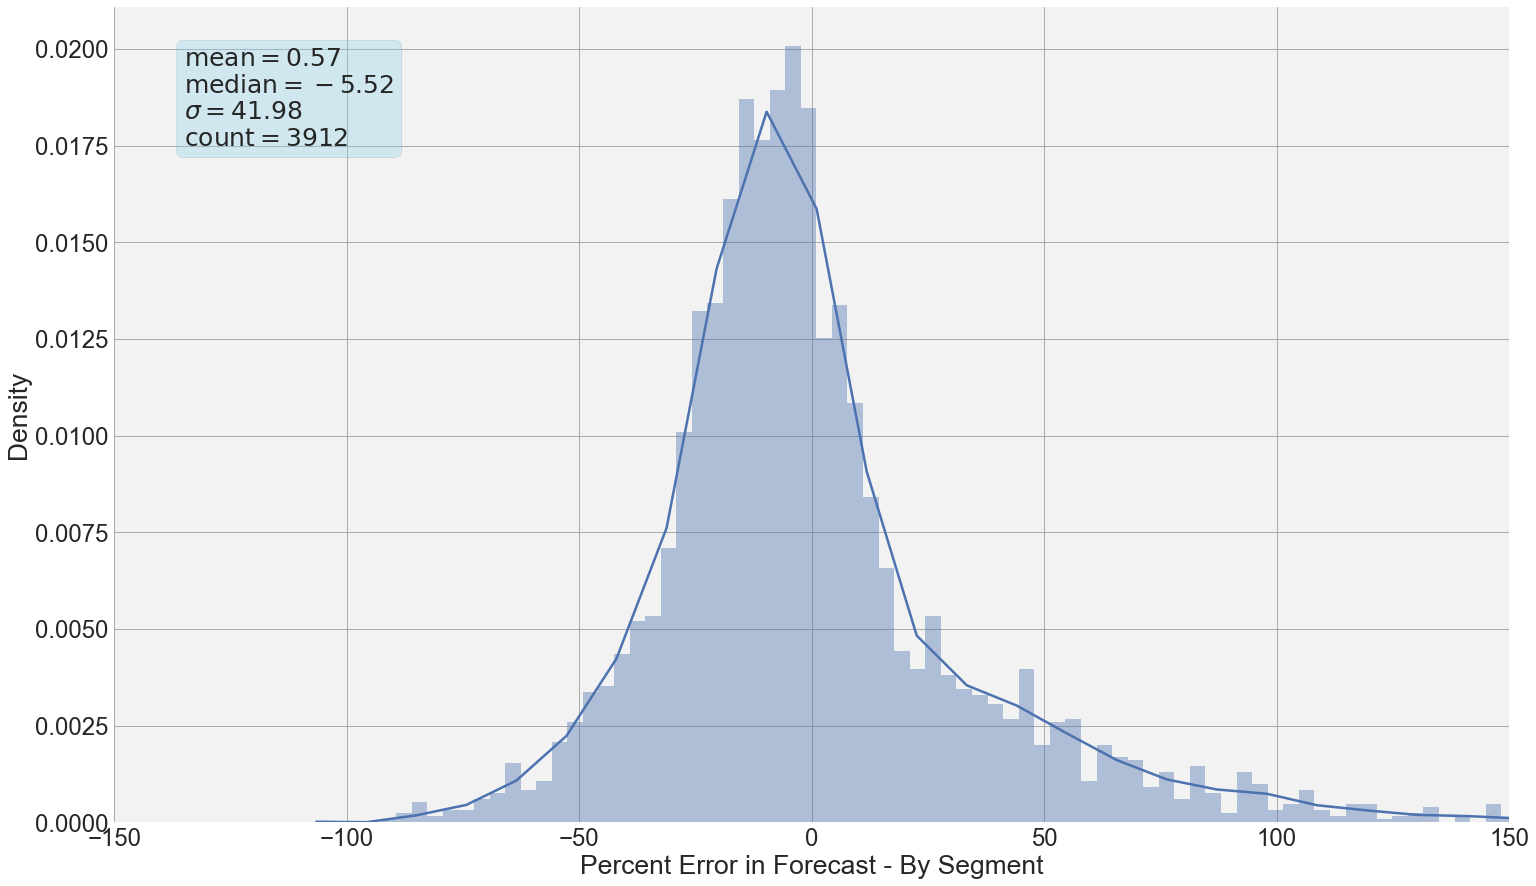

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = flatdata_adjusted['PercentError']
mu = x.mean()
median = np.median(x)
sigma = x.std()
count=x.count()
textstr = '$\mathrm{mean}=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{count}=%d$' % (mu, median, sigma,count)

props = dict(boxstyle='round', facecolor='skyblue', alpha=0.3)

sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.6'})
ax=sns.distplot(flatdata_adjusted['PercentError'],bins=400,kde=True,axlabel='Percent Error in Forecast')
ax.figure.set_size_inches(25,15)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xlim(-150,150)
#ax.set_xticks(labels=xtick_data.index,rotation=35, rotation_mode='anchor', ha='right')
#ax.set_ylim(-20,100)
ax.set_xlabel('Percent Error in Forecast - By Segment')
ax.set_ylabel('Density')
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)
#ax.figure.savefig('PE Distribution by Segment_No Outliers.png',bbox_inches='tight')

Text(0.05,0.95,'$\\mathrm{mean}=-5.73$\n$\\mathrm{median}=-7.51$\n$\\sigma=24.93$\n$\\mathrm{count}=1291$')

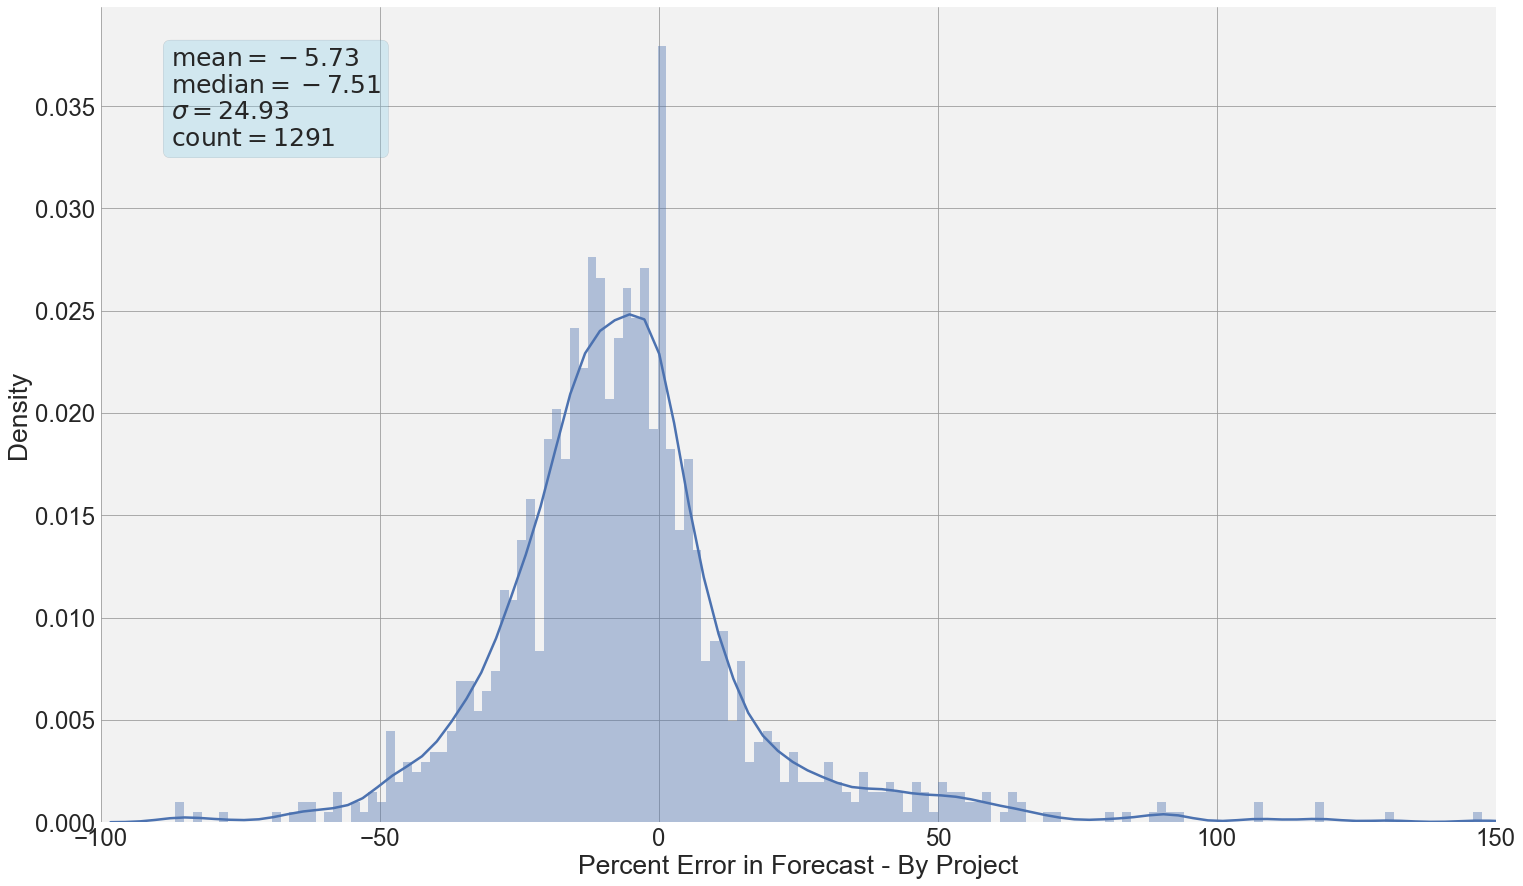

In [10]:
x = project_error['PercentError']
mu = x.mean()
median = np.median(x)
sigma = x.std()
count=x.count()
textstr = '$\mathrm{mean}=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$\n$\mathrm{count}=%d$' % (mu, median, sigma,count)

props = dict(boxstyle='round', facecolor='skyblue', alpha=0.3)

sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.6'})
ax=sns.distplot(project_error['PercentError'],bins=200,kde=True)
ax.figure.set_size_inches(25,15)

ax.set_xlim(-100,150)

ax.set_xlabel('Percent Error in Forecast - By Project')
ax.set_ylabel('Density')
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)
#ax.figure.savefig('PE Distribution by Project_No Outliers.png',bbox_inches='tight')

In [11]:
aggregate = project_error[['PercentError', 'AbsPE']].copy()
aggregate.describe(percentiles=[0.05,0.95])

,PercentError,AbsPE
count,1291.000000,1291.000000
mean,-5.729143,17.391556
std,24.933815,18.757477
min,-86.645461,0.000000
5%,-38.575972,0.573624
50%,-7.510134,12.456747
95%,36.961616,48.530344
max,227.602474,227.602474


In [12]:
aggregate = flatdata_adjusted[['PercentError', 'AbsPE']].copy()
aggregate.describe(percentiles=[0.05,0.95])

,PercentError,AbsPE
count,3912.000000,3912.000000
mean,0.565682,24.735808
std,41.979372,33.920070
min,-92.741935,0.000000
5%,-45.429618,1.277372
50%,-5.517241,16.693850
95%,66.331920,71.096346
max,1246.153846,1246.153846


### 4.1.2 Percent Error over Forecast Volume

#### 4.1.2.1 Segment Level

Text(0,0.5,'Percentage Error')

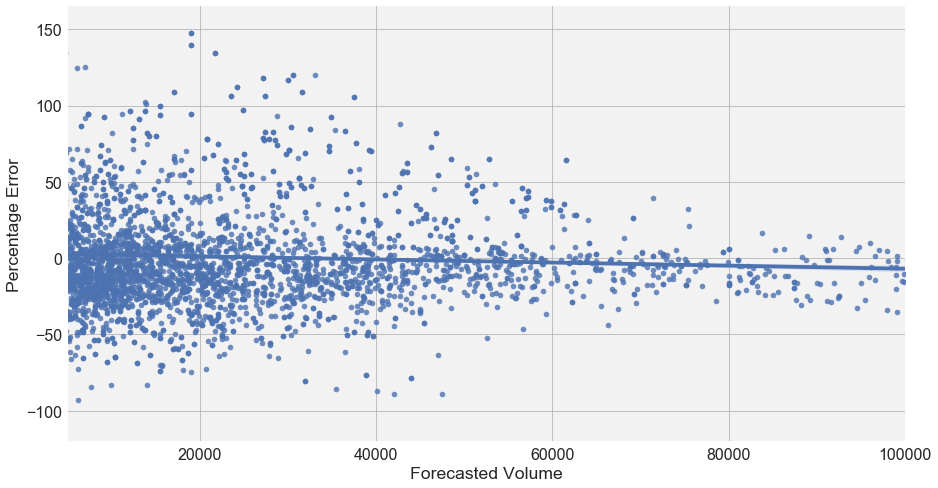

In [13]:
sns.set_context("paper",font_scale=2.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.regplot(flatdata_adjusted['TrafficForecast'],flatdata_adjusted['PercentError'])
ax.figure.set_size_inches(15,8)
ax.set_xlim(5000,100000)

ax.set_ylim(-120,165)
#ax.set_title('Number of records in the data set, by date')
ax.set_xlabel('Forecasted Volume')
ax.set_ylabel('Percentage Error')
#ax.set_facecolor(axis_bgcolor)
#ax.figure.savefig('scatterplot Percent Error Segment.png',bbox_inches='tight')

In [14]:
bins=[0,3000,6000,9000,13000,17000,22000,30000,40000,60000,717000]
flatdata_adjusted.groupby(pd.cut(flatdata_adjusted['TrafficForecast'], bins)).AbsPE.describe(percentiles=[0.05,0.95])
#flatdata_adjusted.groupby(pd.cut(flatdata_adjusted['TrafficForecast'], bins)).PercentError.describe(percentiles=[0.05,0.95])

,count,mean,std,min,5%,50%,95%,max
TrafficForecast,,,,,,,,
"(0, 3000]",359.0,36.174811,85.334799,0.000000,0.161968,16.417910,106.911465,1246.153846
"(3000, 6000]",418.0,26.698297,28.603699,0.000000,1.428571,18.915045,83.878554,264.109728
"(6000, 9000]",394.0,24.826373,21.978045,0.000000,1.149425,20.312500,62.918875,178.070742
"(9000, 13000]",465.0,23.174048,19.369117,0.000000,1.757121,17.819407,63.043478,96.280992
"(13000, 17000]",353.0,25.314406,23.386070,0.028281,1.411191,18.674695,79.704017,108.823529
"(17000, 22000]",359.0,25.071203,24.534635,0.000000,2.983597,16.535433,67.733822,147.368421
"(22000, 30000]",415.0,28.005767,24.754296,0.000000,1.694915,21.557914,77.776241,117.792543
"(30000, 40000]",387.0,25.868194,24.204533,0.000000,2.108434,17.527174,76.288660,119.696970
"(40000, 60000]",410.0,19.568854,18.302780,0.072569,1.102348,13.764743,56.275835,89.214610


#### 4.1.2.2 Project Level

Text(0,0.5,'Percentage Error')

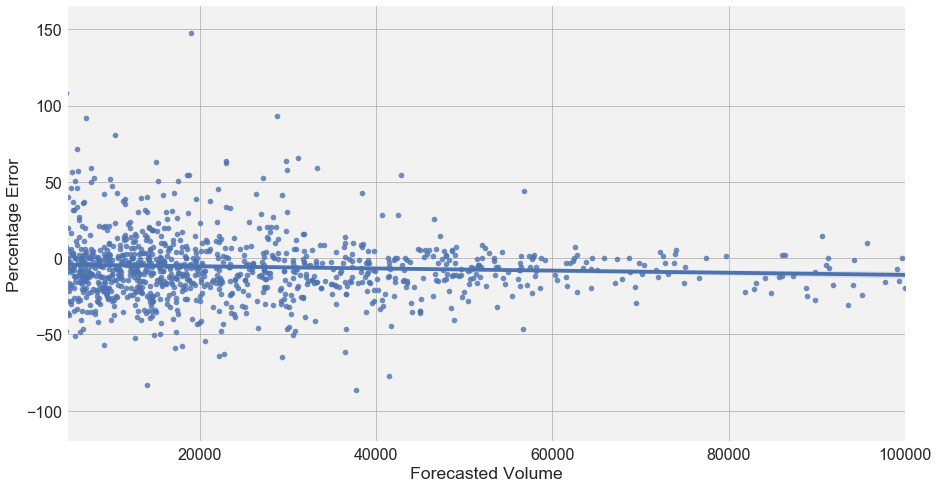

In [15]:
sns.set_context("paper",font_scale=2.0, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.regplot(project_error['AverageForecast'],project_error['PercentError'])
ax.figure.set_size_inches(15,8)
ax.set_xlim(5000,100000)

ax.set_ylim(-120,165)
#ax.set_title('Number of records in the data set, by date')
ax.set_xlabel('Forecasted Volume')
ax.set_ylabel('Percentage Error')
#ax.set_facecolor(axis_bgcolor)
#ax.figure.savefig('scatterplot Percent Error Project Level.png',bbox_inches='tight')

In [16]:
bins=[0,3000,6000,9000,13000,17000,22000,30000,40000,60000,717000]
project_error.groupby(pd.cut(project_error['AverageForecast'], bins)).AbsPE.describe(percentiles=[0.05,0.95])
#flatdata_adjusted.groupby(pd.cut(flatdata_adjusted['TrafficForecast'], bins)).PercentError.describe(percentiles=[0.05,0.95])

,count,mean,std,min,5%,50%,95%,max
AverageForecast,,,,,,,,
"(0, 3000]",133.0,24.589341,34.215707,0.000000,0.211855,12.919463,84.712721,227.602474
"(3000, 6000]",141.0,20.659570,21.471379,0.000000,0.824784,14.044944,55.844156,118.362283
"(6000, 9000]",125.0,16.746673,15.206294,0.000000,0.997662,12.411504,46.258205,91.867652
"(9000, 13000]",145.0,15.588098,13.301730,0.000000,1.088523,12.562296,40.129686,80.372382
"(13000, 17000]",143.0,17.408145,14.157624,0.028281,0.897383,15.025907,41.490133,83.421429
"(17000, 22000]",113.0,17.975563,18.842618,0.005100,2.312601,12.391430,51.887749,147.368421
"(22000, 30000]",133.0,19.544667,17.035847,0.025844,1.200369,14.285714,59.453115,93.379791
"(30000, 40000]",116.0,16.170639,15.049914,0.315789,1.500822,12.464689,46.972802,86.645461
"(40000, 60000]",136.0,13.239257,12.750453,0.003121,0.336692,10.494659,35.485612,77.566425


### 4.1.3 Functional Class
The distribution of percent error by functional class are taken at the segment level, since a project may span over roadways of different functional class. Violin plots, as depicted in the figure shows quantitative data with a kernel density estimation of the underlying distribution. The thick black bars represent the 25th and 75th percentile values, in effect depicting the range of values where 50% of the datapoints fall in. 

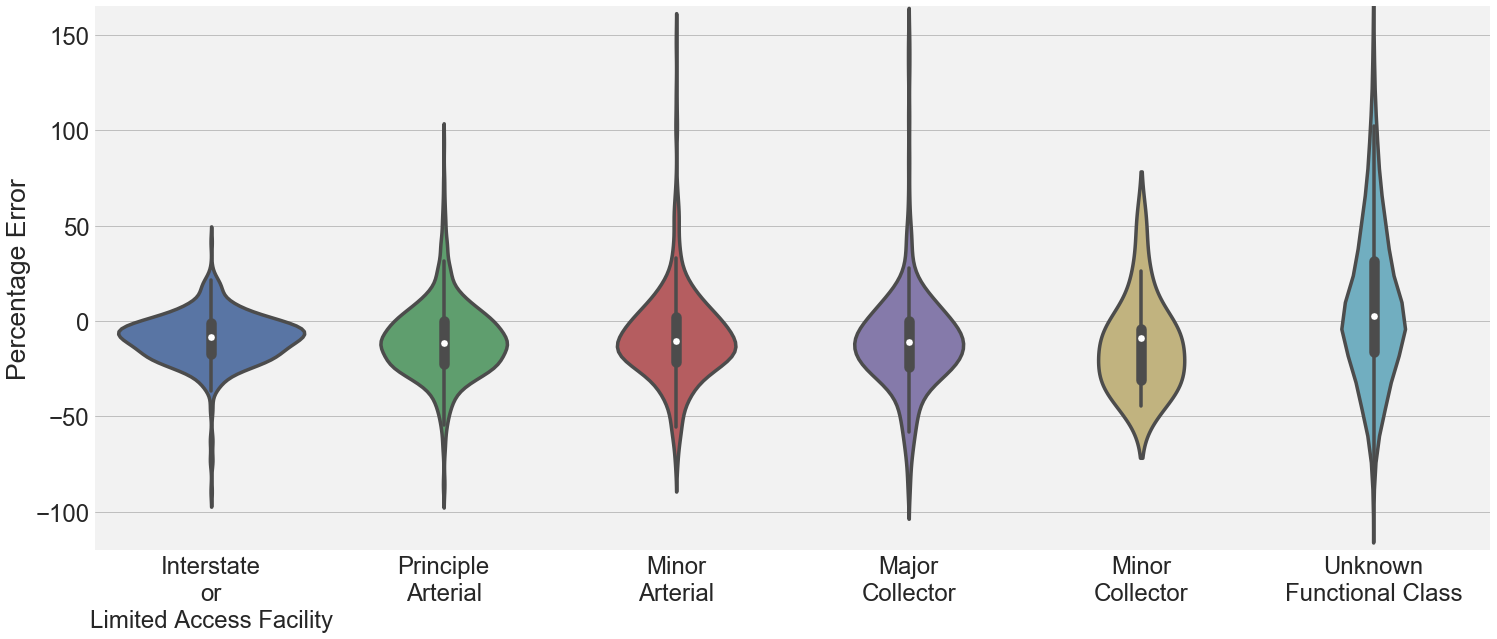

In [16]:
#flatdata_adjusted=pd.read_csv('flatdata.csv',encoding='latin-1') #Only US Projects
#flatdata_adjusted=flatdata_adjusted.assign(DiffYear=flatdata_adjusted['ForecastYear']-flatdata_adjusted['YearForecastProduced'])
#flatdata_adjusted=flatdata_adjusted[flatdata_adjusted['DiffYear']>=0]
flatdata_adjusted2=flatdata_adjusted[flatdata_adjusted['FunctionalClass']!=7]
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.violinplot(x=flatdata_adjusted2['FunctionalClass'],y=flatdata_adjusted2['PercentError'],
                  palette='deep',
                  x_order=['1','3','4','5','6','8'],
                  alpha='0.5'
                  
                 )
ax.figure.set_size_inches(25,10)
ax.set_ylim(-120,165)
ax.set_xlabel('')
ax.figure.get_axes()[0].set_xticklabels(['Interstate\nor\nLimited Access Facility',"Principle\nArterial","Minor\nArterial",
                                        'Major\nCollector','Minor\nCollector','Unknown\nFunctional Class'])
ax.set_ylabel('Percentage Error')
ax.figure.savefig('violin plot of Functional Class2.png',bbox_inches='tight')

In [18]:
flatdata_adjusted.groupby('FunctionalClass').PercentError.describe(percentiles=[0.05,0.95]).to_csv('func.csv')
flatdata_adjusted.groupby('FunctionalClass').AbsPE.describe(percentiles=[0.05,0.95])

,count,mean,std,min,5%,50%,95%,max
FunctionalClass,,,,,,,,
1,434.0,12.323932,10.827015,0.072569,0.874138,10.064501,28.411677,89.214610
3,838.0,17.282387,13.953416,0.000000,1.015228,14.133608,42.888355,93.379791
4,404.0,18.921652,17.655198,0.000000,1.101376,15.297573,53.084880,146.666667
5,258.0,20.668484,20.325996,0.000000,0.798169,15.601066,57.836291,146.464646
6,19.0,22.526790,15.036195,2.222222,4.072058,26.027397,45.364281,51.515152
7,1.0,46.666667,NaN,46.666667,46.666667,46.666667,46.666667,46.666667
8,1958.0,32.422758,44.080853,0.000000,1.736111,24.136984,86.511479,1246.153846


### 4.1.4 Area Type
Area Type of the Project is coded by Rural, Mostly Rural, Urban and Unknown Type

In [22]:
flatdata_adjusted=flatdata_adjusted.assign(Area=flatdata_adjusted.apply(areatype,axis=1))
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.violinplot(x=flatdata_adjusted['Area'],y=flatdata_adjusted['PercentError'],
                  palette='deep',               
                 )
ax.figure.set_size_inches(25,10)
ax.set_xlabel('')
ax.figure.get_axes()[0].set_xticklabels(['Projects on\nRural Area','Projects on\nUrban Area','Unknown Area Type'])
ax.set_ylabel('Percentage Error')
#ax.figure.savefig('violin plot of area type.png',bbox_inches='tight')

NameError: name 'areatype' is not defined

In [21]:
flatdata_adjusted.groupby('Area').PercentError.describe(percentiles=[0.05,0.95]).to_csv('are2.csv')
flatdata_adjusted.groupby('FunctionalClass').AbsPE.describe(percentiles=[0.05,0.95])

KeyError: 'Area'

### 4.1.5 Type of Project

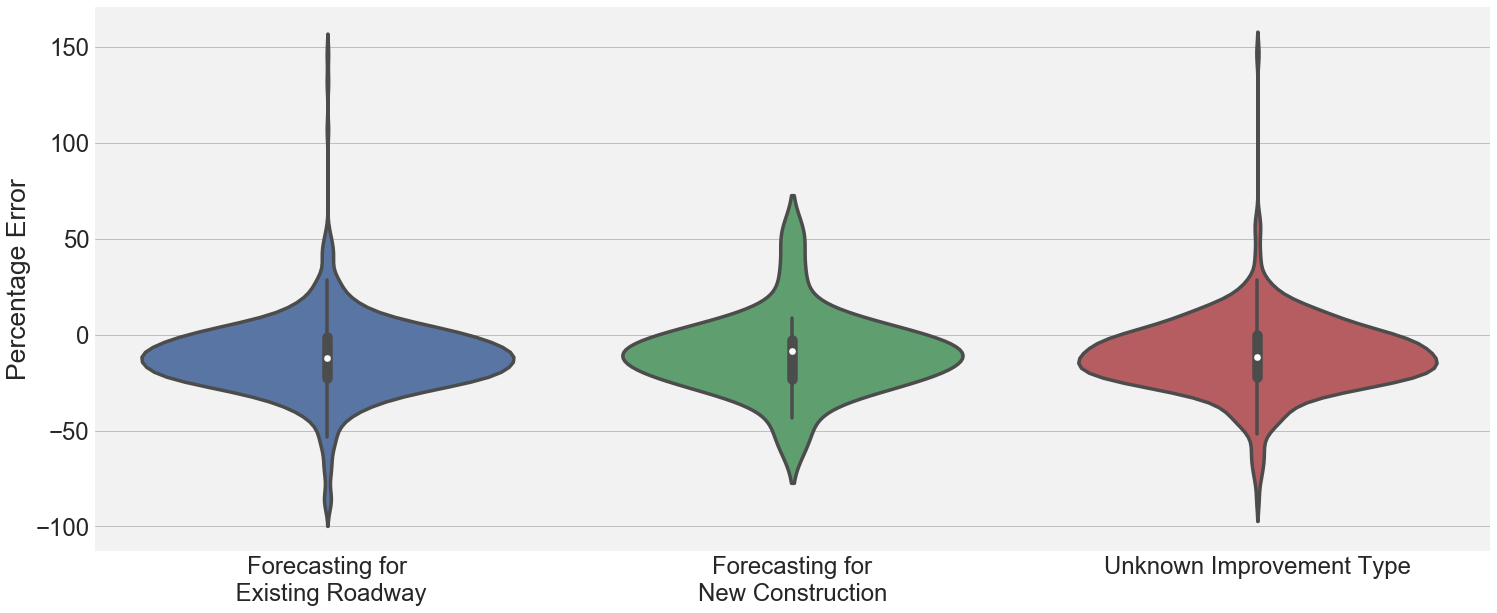

In [25]:
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.violinplot(x=project_error['UnifiedImprovementType'],y=flatdata_adjusted['PercentError'],
                  palette='deep'              
                 )
ax.figure.set_size_inches(25,10)
ax.set_xlabel('')
ax.set_xlabel('')
ax.figure.get_axes()[0].set_xticklabels(['Forecasting for\n Existing Roadway',"Forecasting for\nNew Construction",
                                        'Unknown Improvement Type'])
ax.set_ylabel('Percentage Error')
ax.figure.savefig('violin plot of area type.png',bbox_inches='tight')

### 4.1.6 Year Forecast Produced

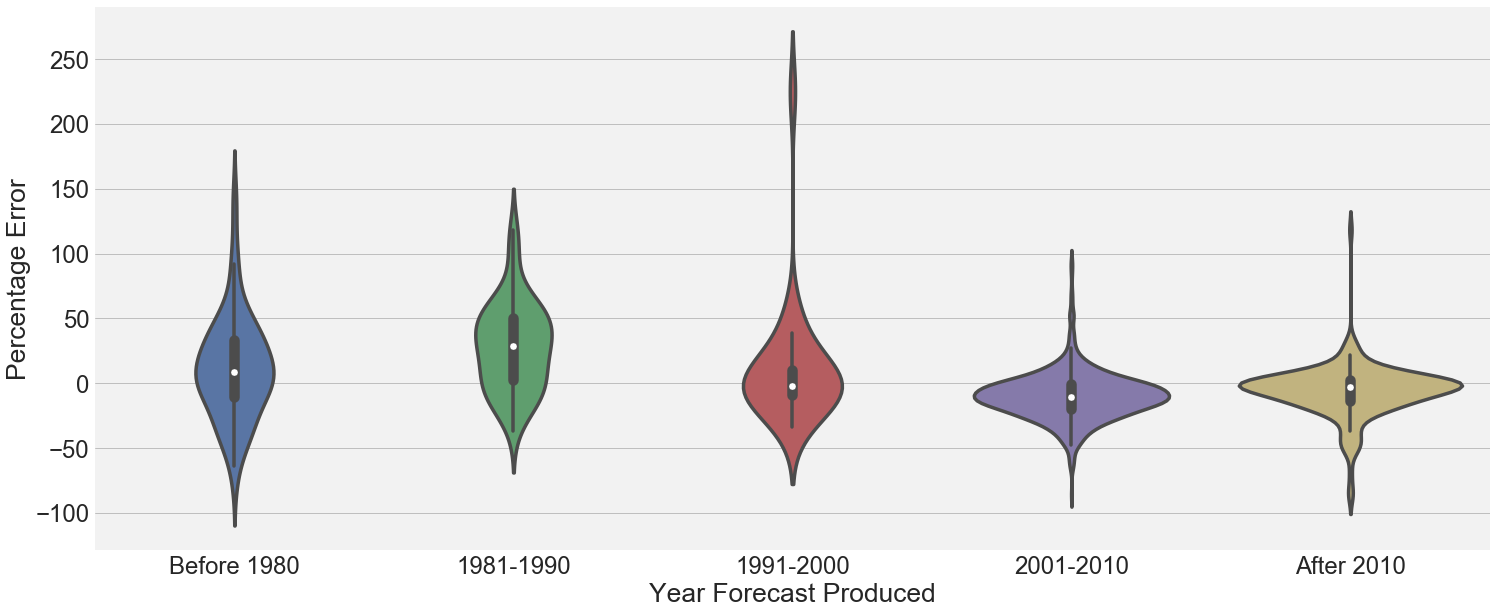

In [22]:
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.violinplot(x=project_error['Decade_ForecastProduced'],y=project_error['PercentError'],
                  palette='deep',
#                  x_order=['Before 1990','1991-2000','2001-2002','2002-2008','2008-2012','After 2012'],
#                  scale='count'
                  
                 )
ax.figure.set_size_inches(25,10)
ax.set_xlabel('Year Forecast Produced')
ax.figure.get_axes()[0].set_xticklabels(['Before 1980','1981-1990','1991-2000','2001-2010','After 2010'])
ax.set_ylabel('Percentage Error')
ax.figure.savefig('violin plot of year produced_Project.png',bbox_inches='tight')

In [23]:
aggregate = project_error[['PercentError', 'AbsPE','Decade_ForecastProduced']].copy()
aggregate.groupby('Decade_ForecastProduced').describe(percentiles=[0.05,0.95]).to_csv('decade produced.csv')

### 4.1.7 Opening Year

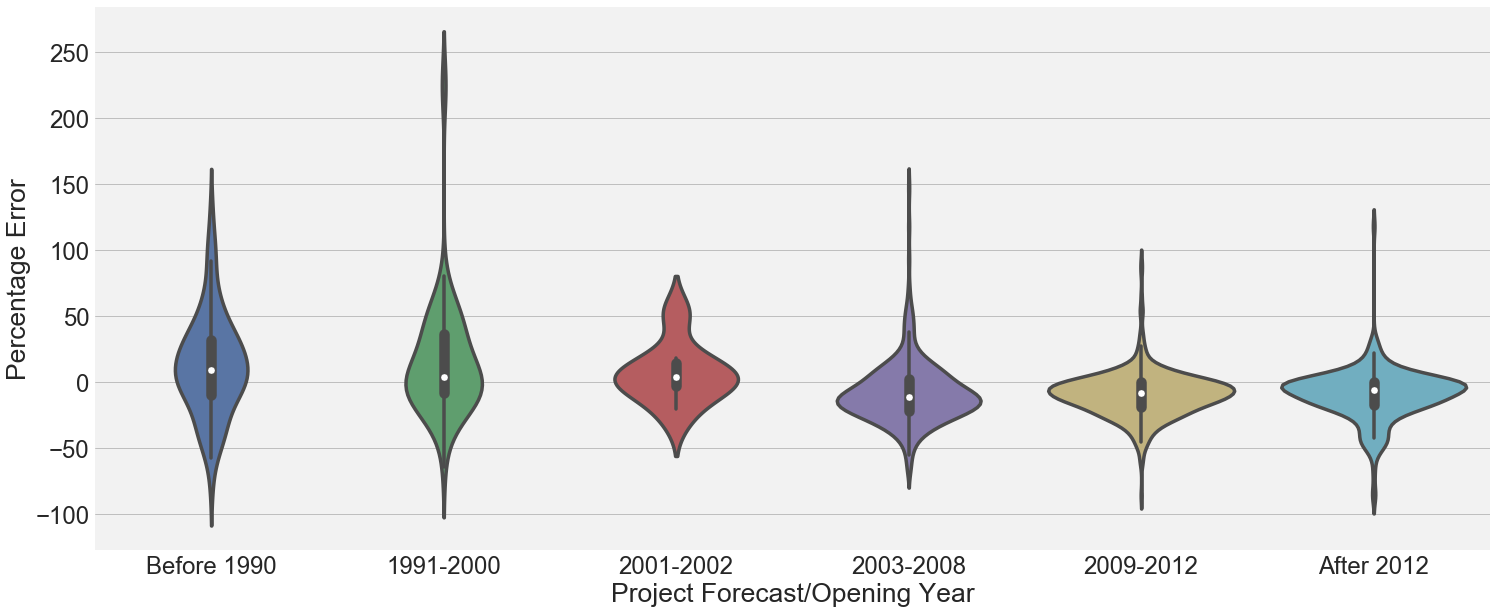

In [26]:
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.violinplot(x=project_error['Decade_Opening'],y=project_error['PercentError'],
                  palette='deep',
                  x_order=['Before 1990','1991-2000','2001-2002','2003-2008','2008-2012','After 2012'],
#                  scale='count'
                  
                 )
ax.figure.set_size_inches(25,10)
ax.set_xlabel('Project Forecast/Opening Year')
ax.figure.get_axes()[0].set_xticklabels(['Before 1990','1991-2000','2001-2002','2003-2008','2009-2012','After 2012'])
ax.set_ylabel('Percentage Error')
ax.figure.savefig('violin plot of year opening_Project.png',bbox_inches='tight')

In [27]:
aggregate = project_error[['PercentError', 'AbsPE','Decade_Opening']].copy()
aggregate.groupby('Decade_Opening').describe(percentiles=[0.05,0.95]).to_csv('decade opening.csv')

### 4.1.8 Forecast Horizon

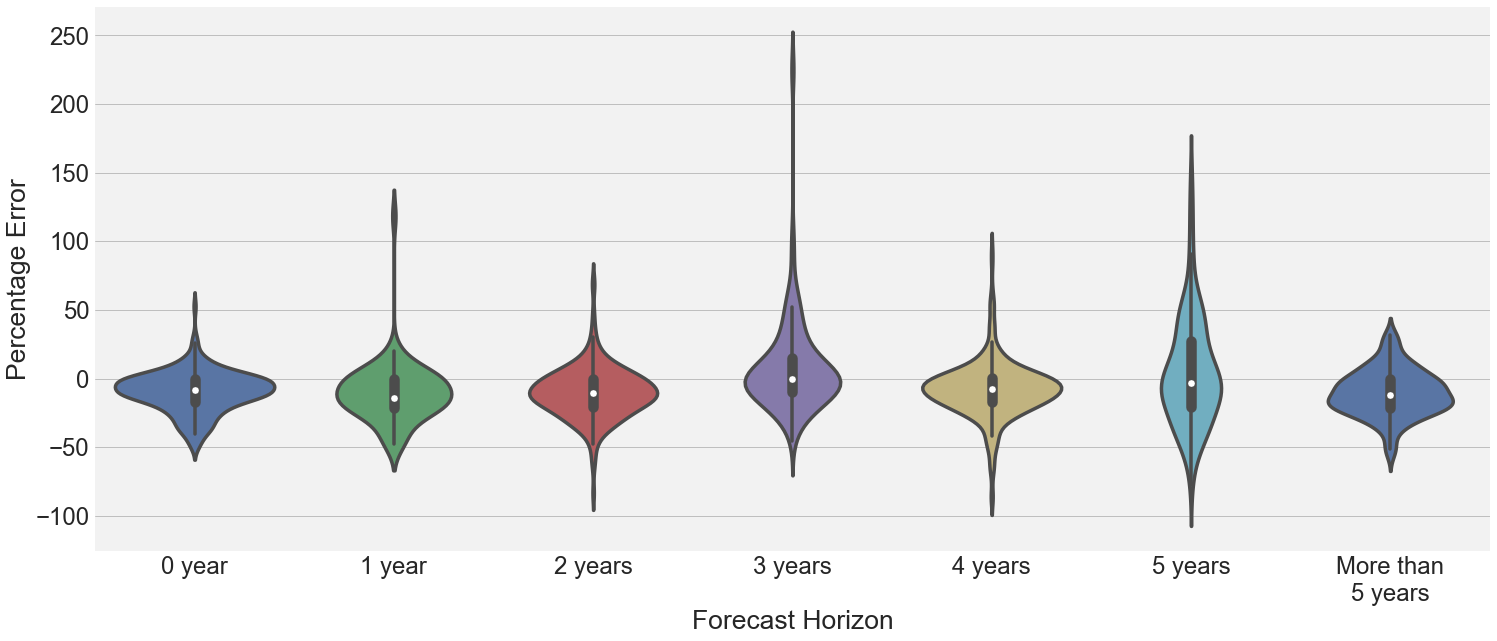

In [39]:
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.violinplot(x=project_error['ForecastHorizon'],y=project_error['PercentError'],
                  palette='deep',
#                  x_order=[0,1,2,3,4,5],
#                  scale='count'
                  
                 )
ax.figure.set_size_inches(25,10)
ax.set_xlabel('Forecast Horizon')
ax.figure.get_axes()[0].set_xticklabels(['0 year','1 year','2 years','3 years','4 years','5 years','More than\n5 years'])
ax.set_ylabel('Percentage Error')
ax.figure.savefig('violin plot of forecast horizon_Project.png',bbox_inches='tight')

In [36]:
aggregate = project_error[['PercentError', 'AbsPE','ForecastHorizon']].copy()
aggregate.groupby('ForecastHorizon').describe(percentiles=[0.05,0.95]).to_csv('forecast_horizon.csv')

In [29]:
project_error[project_error['AbsPE']>150]

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,UnemploymentRate_OpeningYear,Diff_Year,UnifiedImprovementType,Forecast_Method,Area_Type,ForecastYear,YearForecastProduced,Year_ofObservation,ImprovementType,Agency,FunctionalClass
1241,NO11,2500.0,763.12,1736.88,1736.88,227.602474,227.602474,NO,4.02,5.35,3.52,8,3,6,4,1994,1994,2010.0,4,1,8
1247,NO21,6470.0,2010.15,4459.85,4459.85,221.866527,221.866527,NO,3.74,5.97,3.21,8,3,6,4,1993,1993,2011.0,4,1,8


### 4.1.9 Unemployment rate in Opening Year

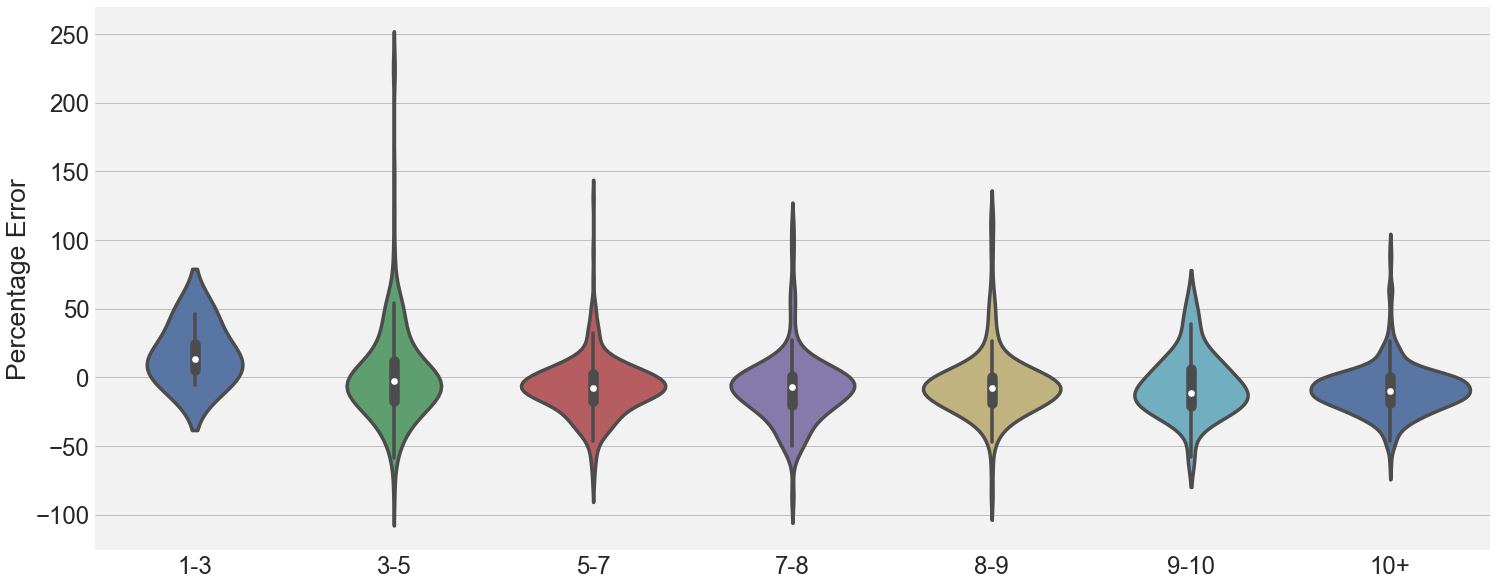

In [10]:
def unemp_rate(x):
    if x.UnemploymentRate_OpeningYear<=3:
        Rate=3
    elif x.UnemploymentRate_OpeningYear<=5:
        Rate=5
    elif x.UnemploymentRate_OpeningYear<=7:
        Rate=7
    elif x.UnemploymentRate_OpeningYear<=8:
        Rate=8
    elif x.UnemploymentRate_OpeningYear<=9:
        Rate=9
    elif x.UnemploymentRate_OpeningYear<=10:
        Rate=10
    else:
        Rate=11
    return Rate
df2=project_error.assign(Range_Open=project_error.apply(unemp_rate,axis=1))
df2
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.violinplot(x=df2['Range_Open'],y=df2['PercentError'],
                  palette='deep',
#                  x_order=[0,1,2,3,4,5],
#                  scale='count'
                  
                 )
ax.figure.set_size_inches(25,10)
ax.set_xlabel('')
ax.figure.get_axes()[0].set_xticklabels(['1-3','3-5','5-7','7-8','8-9','9-10','10+'])
ax.set_ylabel('Percentage Error')
ax.figure.savefig('violin plot of Opening Year Unemployment_Project.png',bbox_inches='tight')

### 4.1.10 Change in Unemployment rate

Text(0,0.5,'Percentage Error')

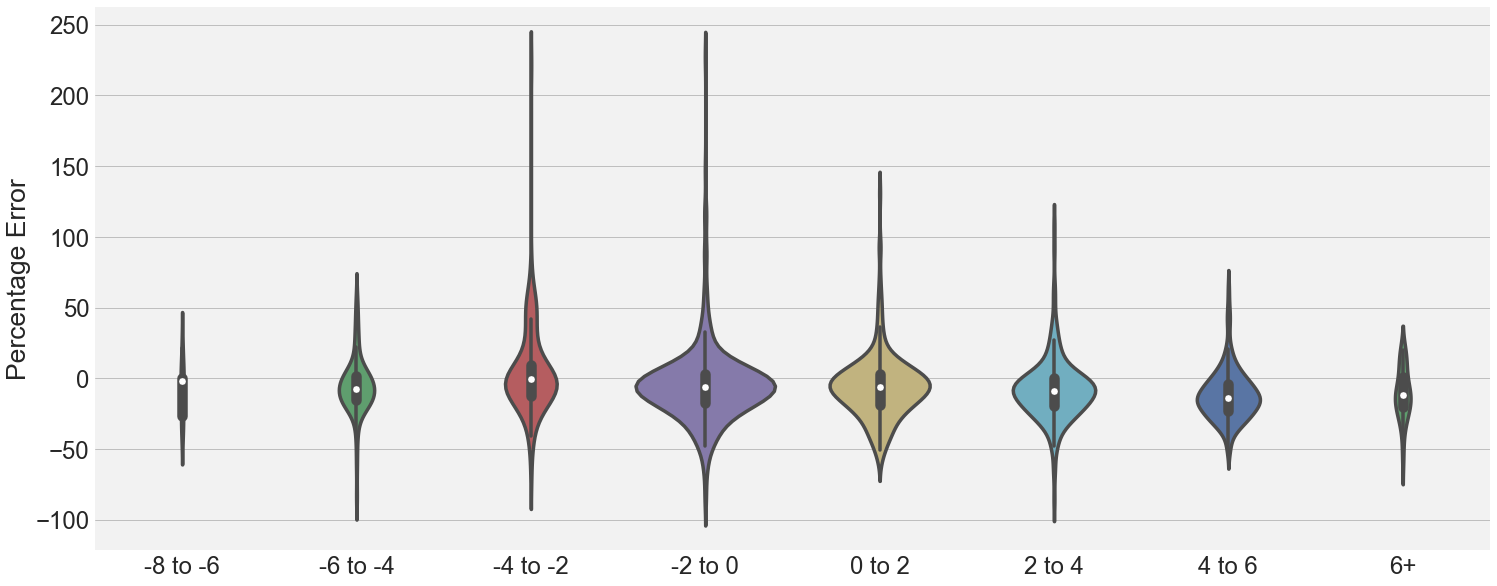

In [22]:
def unemp_change(x):
    if x.Change<=-6:
        change2=1
    elif x.Change<=-4:
        change2=2
    
    elif x.Change<=-2:
        change2=4
    
    elif x.Change<=0:
        change2=6
    
    elif x.Change<=2:
        change2=8
    
    elif x.Change<=4:
        change2=10
    
    elif x.Change<=6:
        change2=12
    
    else:
        change2=14
    return change2
df2=df2.assign(Change=df2['UnemploymentRate_OpeningYear']-df2['UnemploymentRate_YearProduced'])
df2=df2.assign(Range_Change=df2.apply(unemp_change,axis=1))

sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.violinplot(x=df2['Range_Change'],y=df2['PercentError'],
                  palette='deep',
#                  x_order=[0,1,2,3,4,5],
                  scale='count'
                  
                 )
ax.figure.set_size_inches(25,10)
ax.set_xlabel('')
ax.figure.get_axes()[0].set_xticklabels(['-8 to -6','-6 to -4','-4 to -2','-2 to 0','0 to 2','2 to 4','4 to 6','6+'])
ax.set_ylabel('Percentage Error')

In [23]:
bins=[-8,-6,-4,-2,0,2,4,6,8]
df2.groupby(pd.cut(df2['Change'], bins)).PercentError.describe(percentiles=[0.05,0.7])

#df2.groupby(pd.cut(df2['Change'], bins)).AbsPE.describe(percentiles=[0.05,0.95])


,count,mean,std,min,5%,50%,70%,max
Change,,,,,,,,
"(-8, -6]",8.0,-8.685810,19.288183,-35.374150,-32.685505,-2.017039,-1.153530,21.428571
"(-6, -4]",93.0,-5.628288,20.300275,-83.421429,-31.300453,-7.179115,0.063327,57.945500
"(-4, -2]",136.0,4.446945,31.387419,-68.823529,-30.606498,-0.669207,6.154274,221.866527
"(-2, 0]",367.0,-4.657362,28.294742,-86.645461,-40.838152,-6.363428,0.681486,227.602474
"(0, 2]",263.0,-6.000663,23.272517,-57.198844,-40.578597,-6.319703,0.215351,130.769231
"(2, 4]",217.0,-8.013314,22.120656,-85.862069,-36.086572,-8.627673,-1.616562,108.128398
"(4, 6]",166.0,-11.752378,17.797568,-50.994764,-35.257208,-13.941746,-4.835742,63.755459
"(6, 8]",41.0,-10.511725,17.963143,-57.777778,-36.000000,-11.522634,-2.515723,20.106762


### 4.1.11 Forecast method

Text(0,0.5,'Percentage Error')

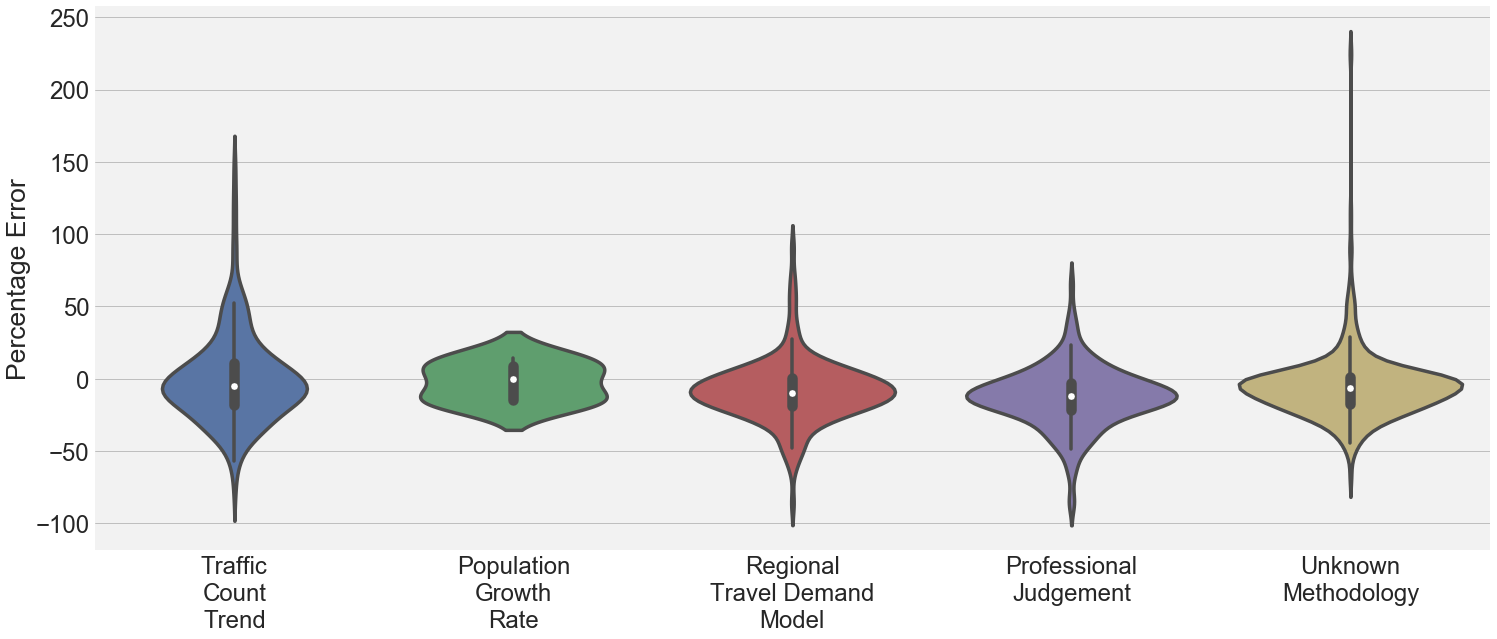

In [27]:
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.violinplot(x=df2['Forecast_Method'],y=df2['PercentError'],
                  palette='deep',
#                  x_order=[0,1,2,3,4,5],
#                  scale='count'
                  
                 )
ax.figure.set_size_inches(25,10)
ax.set_xlabel('')
ax.figure.get_axes()[0].set_xticklabels(['Traffic\nCount\nTrend',"Population\nGrowth\nRate",
                                        'Regional\nTravel Demand\nModel','Professional\nJudgement',
                                        'Unknown\nMethodology'])
ax.set_ylabel('Percentage Error')

In [28]:
pd.options.display.max_columns=50
df=project_error[project_error['YearForecastProduced']>2000]
df

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,UnemploymentRate_OpeningYear,Diff_Year,UnifiedImprovementType,Forecast_Method,Area_Type,ForecastYear,YearForecastProduced,Year_ofObservation,ImprovementType,Agency,FunctionalClass,Decade_ForecastProduced,Decade_Opening,DiffYear,ForecastHorizon
0,10914,67797.500000,69861.250000,-2063.750000,2063.750000,-2.954070,2.954070,OH,5.400000,6.30,5.400000,1,2,6,3,2005,2004,2006.0,11,6,1,5,4,1,1
1,12343,99720.000000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,OH,8.900000,8.90,10.200000,5,1,6,3,2017,2012,2010.0,1,6,1,5,6,5,5
2,12356,28800.000000,31001.000000,-2201.000000,2201.000000,-7.099771,7.099771,OH,6.500000,5.90,6.500000,3,3,6,3,2009,2006,2008.0,12,6,1,5,5,3,3
3,13364,4610.000000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,OH,10.200000,10.30,10.200000,1,1,6,3,2010,2009,2010.0,1,6,5,5,5,1,1
4,13486,53705.000000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,OH,6.500000,5.90,6.500000,5,1,6,3,2010,2005,2008.0,3,6,1,5,5,5,5
5,13624,580.000000,635.000000,-55.000000,55.000000,-8.661417,8.661417,OH,10.200000,6.50,10.200000,0,1,6,3,2008,2008,2010.0,1,6,6,5,4,0,0
6,14821,34445.000000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,OH,10.200000,5.90,10.200000,2,1,6,3,2007,2005,2010.0,3,6,4,5,4,2,2
7,16144,15556.000000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,OH,10.300000,5.50,10.300000,6,1,6,3,2013,2007,2009.0,2,6,3,5,6,6,5+
8,16514,54630.000000,58143.333330,-3513.333333,3513.333333,-6.042539,6.042539,OH,10.200000,6.30,10.200000,6,2,6,3,2009,2003,2010.0,11,6,1,5,5,6,5+
9,16579,2190.000000,2193.500000,-3.500000,3.500000,-0.159562,0.159562,OH,6.500000,6.50,6.500000,0,1,6,3,2009,2009,2008.0,1,6,5,5,5,0,0


In [34]:
df.groupby(['UnifiedImprovementType','Forecast_Method']).AbsPE.describe(percentiles=[0.05,0.95])

count       mean        std  \
UnifiedImprovementType Forecast_Method                                
1                      1                 67.0  17.040787  15.370396   
                       2                  5.0   9.644562   6.816435   
                       4                107.0  16.755569  14.827106   
                       5                139.0  18.557277  15.415292   
                       6                492.0  13.432564  12.782728   
2                      6                 27.0  10.728992   8.073266   
3                      1                 86.0  15.030538  12.334455   
                       2                  2.0  15.508893   2.103154   
                       4                 67.0  17.611209  18.289251   
                       5                 38.0  18.523649  16.479988   
                       6                 71.0  16.107354  14.477751   

                                              min         5%        50%  \
UnifiedImprovementType Forecast_Method                                    
1                      1                 0.436681   1.233777  13.372093   
                       2                 0.346620   1.156417  13.571429   
                       4                 0.000000   1.261266  13.320261   
                       5                 0.639378   1.348480  14.285714   
                       6                 0.000000   0.032789  10.699401   
2                      6                 0.521221   1.416712   8.884641   
3                      1                 0.598802   2.038793  11.461412   
                       2                14.021739  14.170455  15.508893   
                       4                 0.213675   0.998158  12.547529   
                       5                 2.578797   3.110597  15.604117   
                       6                 0.333106   1.585987  11.454545   

                                              95%         max  
UnifiedImprovementType Forecast_Method                         
1                      1                38.584813   93.379791  
                       2                15.038435   15.094340  
                       4                47.295082   63.755459  
                       5                47.954545   83.421429  
                       6                37.139375  118.362283  
2                      6                19.346086   34.383242  
3                      1                38.253216   57.142857  
                       2                16.847332   16.996047  
                       4                52.995690   90.740741  
                       5                47.833093   86.645461  
                       6                47.782173   68.823529

Text(0.5,0,'')

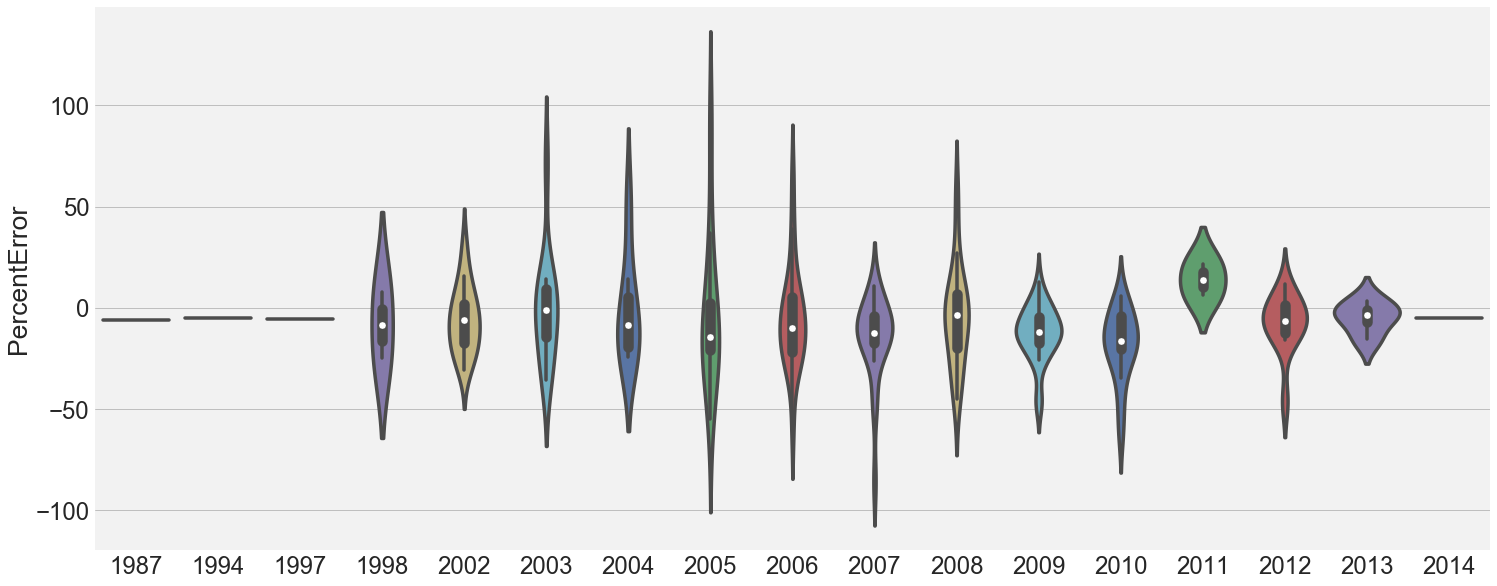

In [25]:
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.violinplot(x=df['YearForecastProduced'],y=df['PercentError'],
                  palette='deep',
#                  x_order=[0,1,2,3,4,5],
#                  scale='count'
                  
                 )
ax.figure.set_size_inches(25,10)
ax.set_xlabel('')

### 4.1.12 Type of Forecaster

Text(0,0.5,'Percentage Error')

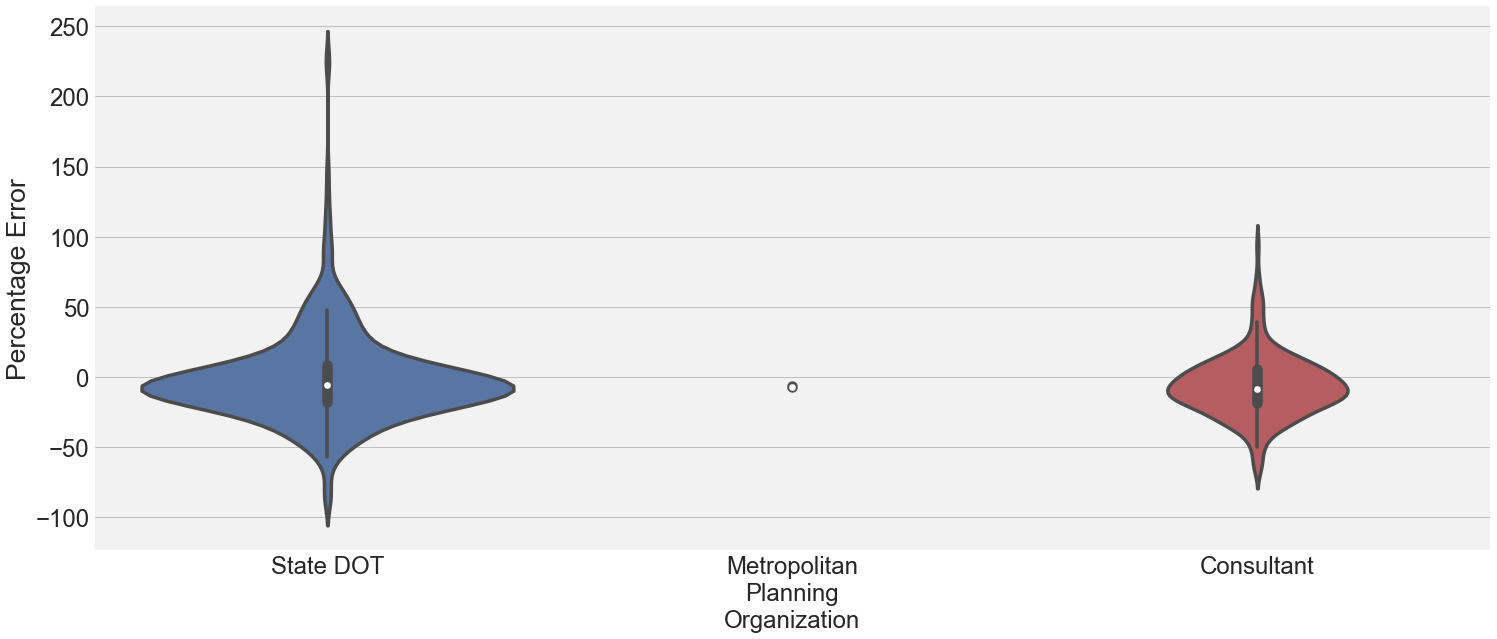

In [32]:
df2=df2[df2['Agency']!=6] #unknown
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.violinplot(x=df2['Agency'],y=df2['PercentError'],
                  palette='deep',
#                  x_order=[0,1,2,3,4,5],
                  scale='count'
                  
                 )
ax.figure.set_size_inches(25,10)
ax.figure.get_axes()[0].set_xticklabels(['State DOT','Metropolitan\nPlanning\nOrganization','Consultant'])
ax.set_xlabel('')
ax.set_ylabel('Percentage Error')

### 4.1.13 Accuracy over the years for projects on existing roadways

In [28]:
df=project_error[project_error['UnifiedImprovementType']==1]
df

,InternalProjectID,AverageCount,AverageForecast,Error,AbsError,PercentError,AbsPE,State,UnemploymentRate_ForecastYear,UnemploymentRate_YearProduced,...,ForecastYear,YearForecastProduced,Year_ofObservation,ImprovementType,Agency,FunctionalClass,Decade_ForecastProduced,Decade_Opening,DiffYear,ForecastHorizon
1,12343,99720.00000,99724.000000,-4.000000,4.000000,-0.004011,0.004011,OH,8.900000,8.90,...,2017,2012,2010.0,1,6,1,5,6,5,5
3,13364,4610.00000,4910.000000,-300.000000,300.000000,-6.109980,6.109980,OH,10.200000,10.30,...,2010,2009,2010.0,1,6,5,4,5,1,1
4,13486,53705.00000,60317.500000,-6612.500000,6612.500000,-10.962822,10.962822,OH,6.500000,5.90,...,2010,2005,2008.0,3,6,1,4,5,5,5
5,13624,580.00000,635.000000,-55.000000,55.000000,-8.661417,8.661417,OH,10.200000,6.50,...,2008,2008,2010.0,1,6,6,4,4,0,0
6,14821,34445.00000,28621.750000,5823.250000,5823.250000,20.345541,20.345541,OH,10.200000,5.90,...,2007,2005,2010.0,3,6,4,4,4,2,2
7,16144,15556.00000,16568.738000,-1012.738000,1012.738000,-6.112342,6.112342,OH,10.300000,5.50,...,2013,2007,2009.0,2,6,3,4,6,6,5+
9,16579,2190.00000,2193.500000,-3.500000,3.500000,-0.159562,0.159562,OH,6.500000,6.50,...,2009,2009,2008.0,1,6,5,4,5,0,0
10,16592,2040.00000,2790.000000,-750.000000,750.000000,-26.881720,26.881720,OH,10.200000,10.30,...,2010,2009,2010.0,1,6,5,4,5,1,1
12,16669,66695.00000,76644.500000,-9949.500000,9949.500000,-12.981362,12.981362,OH,10.200000,10.20,...,2012,2010,2010.0,1,6,1,4,5,2,2
18,18221,7760.00000,9880.000000,-2120.000000,2120.000000,-21.457490,21.457490,OH,10.300000,10.30,...,2010,2009,2009.0,1,6,3,4,5,1,1


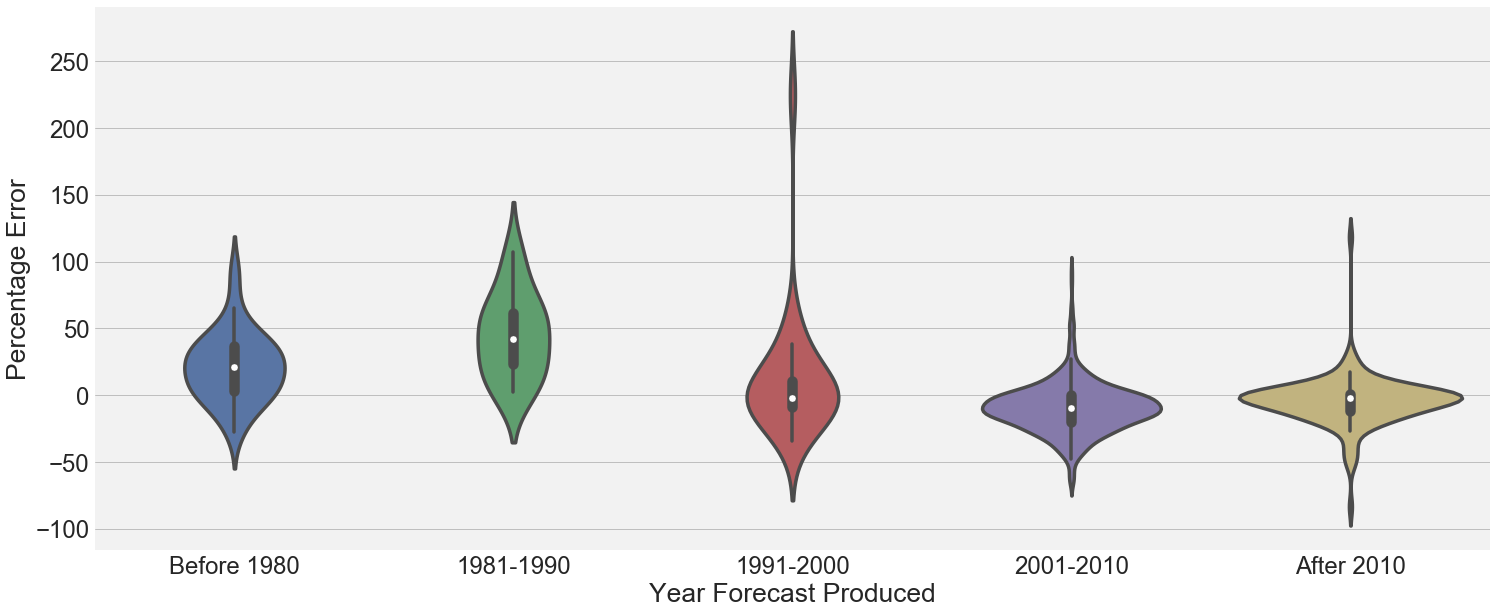

In [32]:
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.violinplot(x=df['Decade_ForecastProduced'],y=df['PercentError'],
                  palette='deep',
#                  x_order=['Before 1990','1991-2000','2001-2002','2002-2008','2008-2012','After 2012'],
#                  scale='count'
                  
                 )
ax.figure.set_size_inches(25,10)
ax.set_xlabel('Year Forecast Produced')
ax.figure.get_axes()[0].set_xticklabels(['Before 1980','1981-1990','1991-2000','2001-2010','After 2010'])
ax.set_ylabel('Percentage Error')
ax.figure.savefig('violin plot of year produced_Existing Project.png',bbox_inches='tight')

In [31]:
aggregate = df[['PercentError', 'AbsPE','Decade_ForecastProduced']].copy()
aggregate.groupby('Decade_ForecastProduced').describe(percentiles=[0.05,0.95]).to_csv('decade_existing.csv')

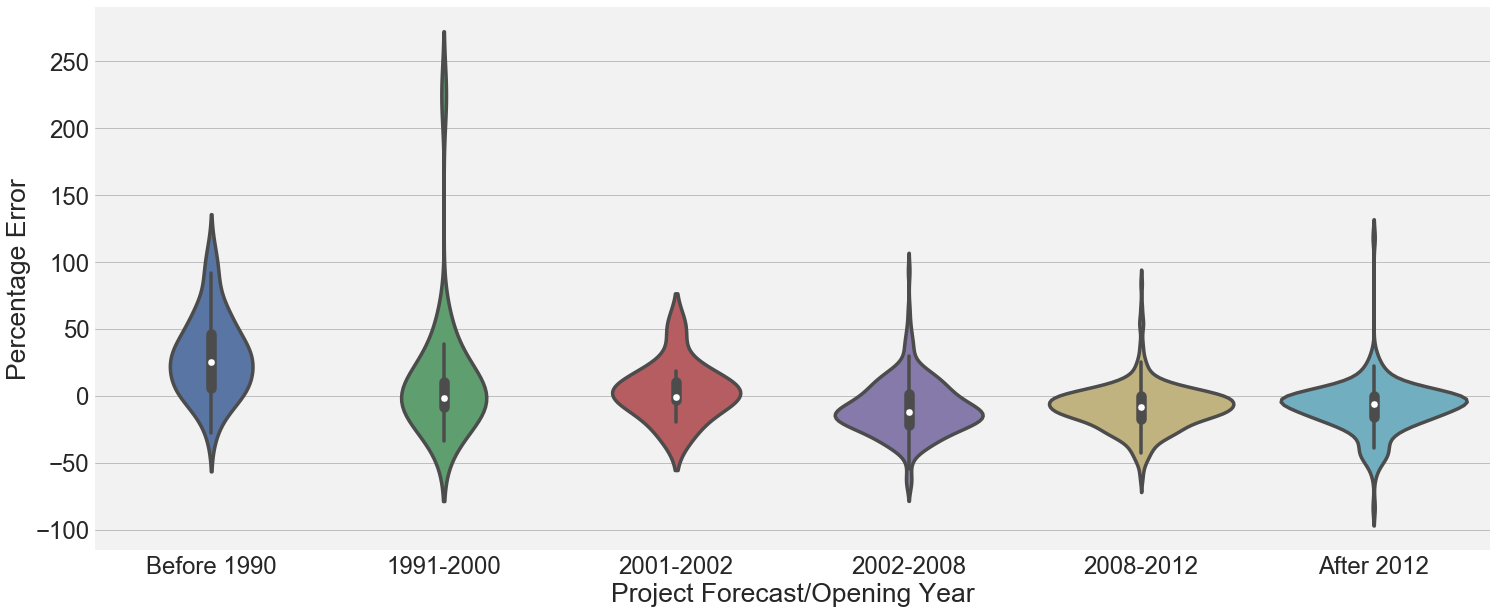

In [35]:
sns.set_context("paper",font_scale=3.0, rc={"lines.linewidth": 3.5})
sns.set_style("darkgrid",{"axes.facecolor": ".95",'grid.color': '.7',})
ax=sns.violinplot(x=df['Decade_Opening'],y=df['PercentError'],
                  palette='deep',
                  x_order=['Before 1990','1991-2000','2001-2002','2002-2008','2008-2012','After 2012'],
#                  scale='count'
                  
                 )
ax.figure.set_size_inches(25,10)
ax.set_xlabel('Project Forecast/Opening Year')
ax.figure.get_axes()[0].set_xticklabels(['Before 1990','1991-2000','2001-2002','2002-2008','2008-2012','After 2012'])
ax.set_ylabel('Percentage Error')
ax.figure.savefig('violin plot of year open_Existing Project.png',bbox_inches='tight')

In [34]:
aggregate = df[['PercentError', 'AbsPE','Decade_Opening']].copy()
aggregate.groupby('Decade_Opening').describe(percentiles=[0.05,0.95]).to_csv('opening_existing.csv')